## Problem 1 (Overfitting)

In [1]:
import math
from statistics import mean
import numpy as np

mu, sigma = 0, math.sqrt(0.07)
num = 30
sample = np.linspace(0, 1, num)  # uniform period
rand_train = np.random.normal(mu, sigma, num)  # build in fuction with normal distribution
signal = [pow(math.sin(2*math.pi*t), 2) + rand_train[index] for index, t in enumerate(sample)]

### (a)

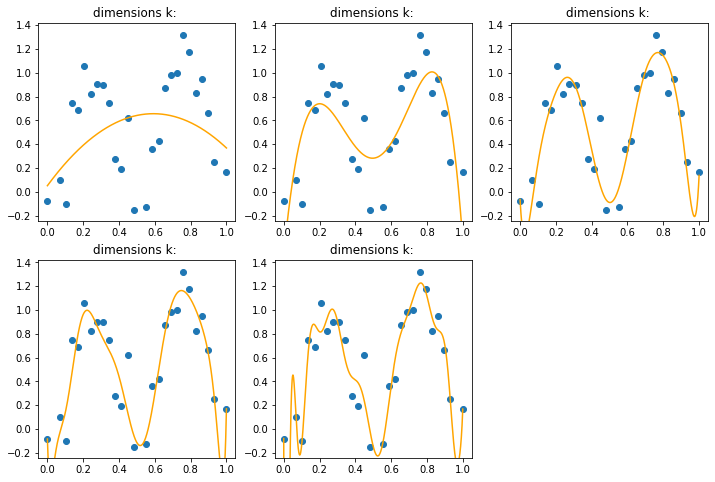

In [2]:
import matplotlib.pyplot as plt

x_axis = np.linspace(0, 1, 1000)
k = [2, 5, 10, 14, 18]
plt.figure(figsize=(12, 8))
for index, i in enumerate(k):
    func = np.poly1d(np.polyfit(sample, signal, deg=i))
    plt.subplot(2, 3, index+1)
    plt.scatter(sample, signal)
    plt.ylim(min(signal)+.1, max(signal)+.1) 
    plt.plot(x_axis, func(x_axis), color='orange')
    plt.title('dimensions k: ')
    
plt.show()

### (b)

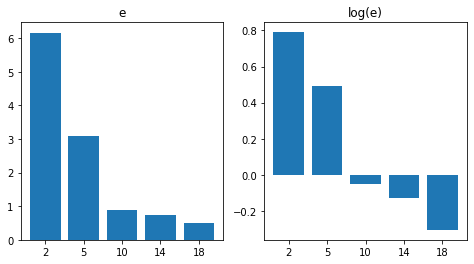

In [3]:
e = np.zeros(len(k))
e_log = np.zeros(len(k))
for index, i in enumerate(k):
    func = np.poly1d(np.polyfit(sample, signal, deg=i))
    e[index] = sum(pow(signal - func(sample), 2))
    e_log[index] = math.log(e[index], 10)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('e')
plt.bar(np.arange(1, 6), e)
plt.xticks(np.arange(1, 6), k)
plt.subplot(1, 2, 2)
plt.title('log(e)')
plt.bar(np.arange(1, 6), e_log)
plt.xticks(np.arange(1, 6), k)
plt.show()

### (c)

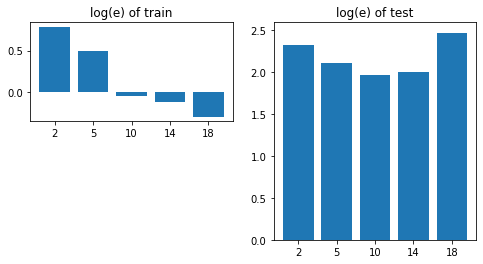

In [4]:
num_test = 1000
sample_test = np.linspace(0, 1, num_test)
rand_test = np.random.normal(mu, sigma, num_test)
normal_distribution = np.zeros(num_test)
signal_test = [pow(math.sin(2*math.pi*t), 2) + rand_test[index] for index, t in enumerate(sample_test)]

e_test = np.zeros(len(k))
e_log_test = np.zeros(len(k))
for index, i in enumerate(k):
    func = np.poly1d(np.polyfit(sample, signal, deg=i))
    e_test[index] = sum(pow(signal_test - func(sample_test), 2))
    e_log_test[index] = math.log(e_test[index], 10)

plt.figure(figsize=(8, 4))
plt.subplot(2, 2, 1)
plt.title('log(e) of train')
plt.bar(np.arange(1, 6), e_log)
plt.xticks(np.arange(1, 6), k)
plt.subplot(1, 2, 2)
plt.title('log(e) of test')
plt.bar(np.arange(1, 6), e_log_test)
plt.xticks(np.arange(1, 6), k)
plt.show()

### (d)

由下圖可見當k>10之後模型的訓練loss雖然下降，但測試loss卻上升，發生overfitting。

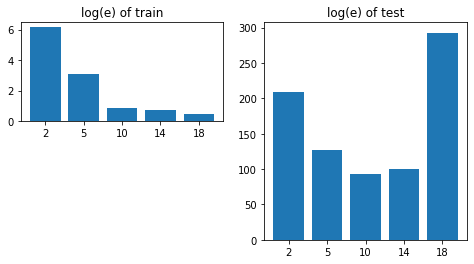

In [5]:
plt.figure(figsize=(8, 4))
plt.subplot(2, 2, 1)
plt.title('log(e) of train')
plt.bar(np.arange(1, 6), e)
plt.xticks(np.arange(1, 6), k)
plt.subplot(1, 2, 2)
plt.title('log(e) of test')
plt.bar(np.arange(1, 6), e_test)
plt.xticks(np.arange(1, 6), k)
plt.show()

## Problem 2 (AIC and BIC)

### AIC=2k-2ln(L)=2k+n*ln(RSS/n)
### BIC=ln(n)k–2ln(L)=ln(n)k+n*ln(RSS/n)

The smaller the better, degree=3 is the best option.

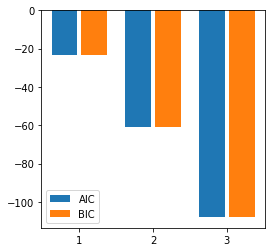

AIC:[ -23.37045659  -60.82771547 -108.16552236]
BIC:[ -23.29101505  -60.66883239 -107.92719773]


In [6]:
x = [0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6]
y = [0.050446, 0.098426, 0.33277, 0.7266, 1.0972, 1.5697, 1.8487, 2.5015]
x_axis = np.linspace(0, 1.8, 100)
aic = np.zeros(3)
bic = np.zeros(3)
n = len(x)

for i in range(0, 3):
    func = np.poly1d(np.polyfit(x, y, i+1))
    RSS = sum(pow(y - func(x), 2))
    aic[i] = n * math.log(RSS/n) + 2*(i+1)
    bic[i] = n * math.log(RSS/n) + math.log(n)*(i+1)

plt.figure(figsize=(4, 4))
plt.bar(np.arange(3)+0.8, aic[(np.arange(3))], width=0.35, label='AIC')
plt.bar(np.arange(3)+1.2, bic[(np.arange(3))], width=0.35, label='BIC')
plt.xticks([1, 2, 3])
plt.legend()
plt.show()
print("AIC:{}".format(aic))
print("BIC:{}".format(bic))


## Problem 3 (Lagrange Multiplier)

### (a)

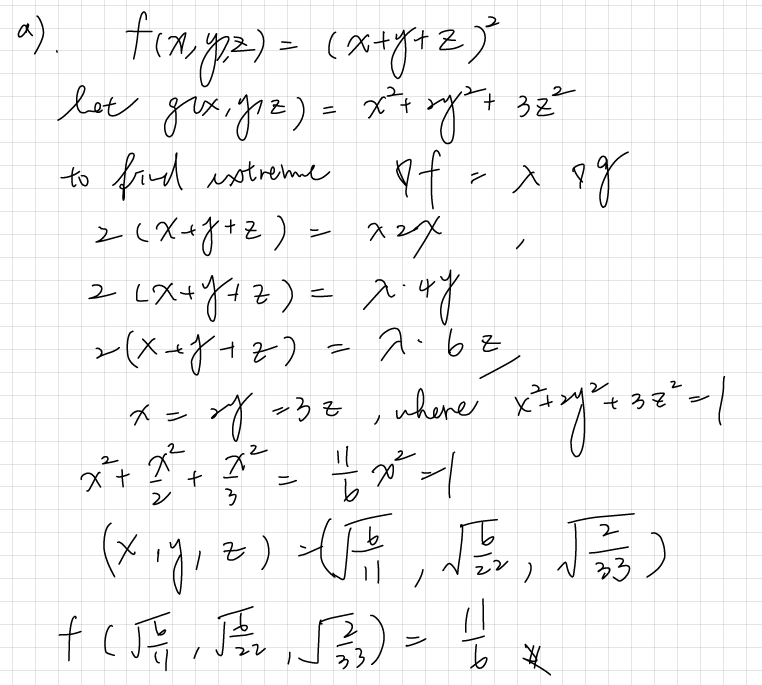

### (b)

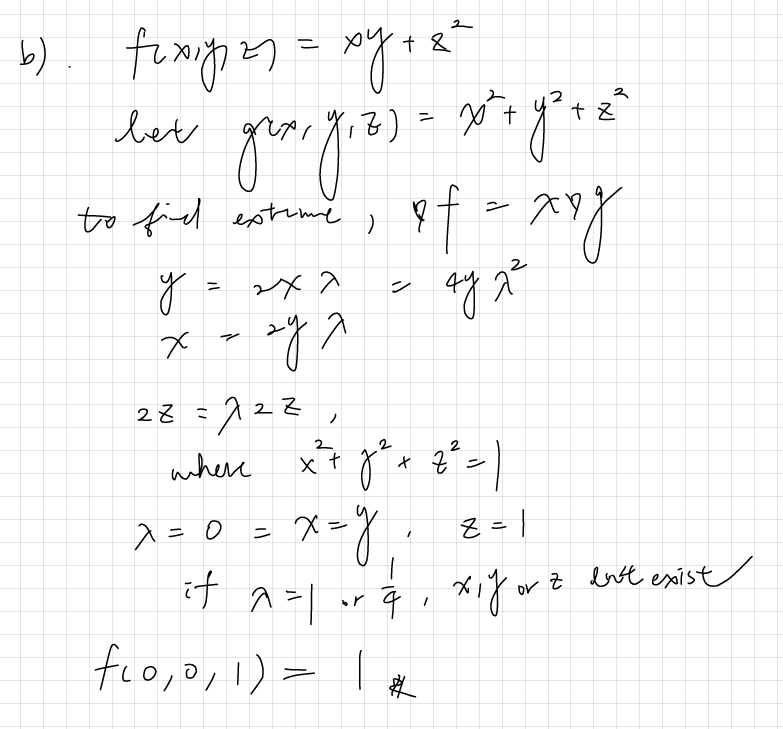